<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/208-PredictiveAnalysis/1_3_LinearRegression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [ ]:
import pandas as pd

# import into data frame
churn_data = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
df = pd.read_csv(churn_data, index_col=0)
print(df.head())

continuous_columns = [
                  "Income",
                  "Tenure",
                  "Outage_sec_perweek",
                  "MonthlyCharge",
                  "Bandwidth_GB_Year",
                                  ]

          Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ...  \
CaseOrder     

In [ ]:
df.dtypes


Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBa

#PIP install scikit-learn

In [ ]:
!pip install -U "scikit-learn==1.0.2"

     |████████████████████████████████| 24.8 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


#Stratified Sampling

In [ ]:
#source: https://realpython.com/train-test-split-python-data/

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

predictors_columns = ["InternetService","Multiple","OnlineBackup","DeviceProtection",
"StreamingTV","StreamingMovies","TechSupport"]

#predictors|independent variables
x = df.loc[:, predictors_columns]
#target|dependent variable
y= df["MonthlyCharge"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=9000, stratify=y)
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)
print(len(train_data))
print(len(test_data))
print(train_data.head())

ValueError: ignored

# Sampling

In [ ]:
import numpy as np

rows = 1000
sample_data = df.sample(n=rows, random_state=42)
print(sample_data.head())

# Syntax:
# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
# Parameters:
# n: int value, Number of random rows to generate.
# frac: Float value, Returns (float value * length of data frame values ). frac cannot be used with n.
# replace: Boolean value, return sample with replacement if True.
# random_state: int value or numpy.random.RandomState, optional. if set to a particular integer, will return same rows as sample in every iteration.
# axis: 0 or ‘row’ for Rows and 1 or ‘column’ for Columns.

          Customer_id                           Interaction  \
CaseOrder                                                     
6253          S231697  e7902b9a-7c4f-4e9f-a195-af71dd6ed55f   
4685          O841175  ca5b5c0d-4270-44bc-8896-9cc97e19f577   
1732          M980625  157e72d3-6e3c-42b8-bb2a-c9d81ff46d9e   
4743           C36783  4204e941-35f9-4f29-b8dc-1c9dfc67005a   
4522          T157033  da4eb7f1-49db-4a26-86a4-3d44a6f55a58   

                                        UID         City State     County  \
CaseOrder                                                                   
6253       c8956d79d1a0b5b21d8396f9022a2d8e      Atlanta    GA     Fulton   
4685       dca68833d5ee6129eaabaeb9b48f7d23  New Meadows    ID      Adams   
1732       941fdb93ceceeed3a3f2a901c9efa085     Stilwell    KS    Johnson   
4743       e2b008d0c9e7f661122f9e3e32732471       Perris    CA  Riverside   
4522       552c76f0138485928f17eecd6d86aa3c       Hamden    OH     Vinton   

             Zip  

# Fit Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

predictors_columns = ["InternetService","Multiple","OnlineBackup","DeviceProtection",
"StreamingTV","StreamingMovies","TechSupport",
                                  ]
y_target = "MonthlyCharge"
x_predictors = "" # explanatory variables

for column_name in predictors_columns:
  x_predictors += column_name + " * "
x_predictors = x_predictors[:-3] # Removes last 3 charactheres from string

#Running a linear regression model
# y = intercept + slope * x
formula = y_target + " ~ " + x_predictors + " + 0" # +0 does not include a global interceptor
print("Formula = ", formula)
model = ols(formula, data=sample_data).fit()

print("\n")

print("Model =\n", model.params)
# intercept, slope = model.params

print("\n")

# Coefficient of deternination: 
# How well the linear regression line fits the observed values (larger is better)
print("R-squared = ", model.rsquared)

# Adjusted coefficient of determination
# Adds penalty when more predictors are added
print("R-squared adjusted = ", model.rsquared_adj)

# Mean squared error
# MSE = RSE**2
mse = model.mse_resid
print("MSE = ", mse)
print("RSE = ", np.sqrt(mse))
# We typically get the X wrong by about RSE_number
# the difference btwn predicted and observed values is aprox 1RSE

# Residual standard error: residuals squared
# The tipical sie of the residuals (smaller is better)
sum_residuals_sq = sum(model.resid**2)
df = len(sample_data.index)-2
# print("DF = ", df)
# print("RSE = ", np.sqrt(sum_residuals_sq/df))#sum of residuals squared

# Root-mean-square error: worse for comparisons between models
print("RMSE = ", np.sqrt(sum_residuals_sq/len(sample_data)))

print("\n")
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Formula =  MonthlyCharge ~ InternetService * Multiple * OnlineBackup * DeviceProtection * StreamingTV * StreamingMovies * TechSupport + 0


Model =
 InternetService[DSL]                                                                                                                                        93.084562
InternetService[Fiber Optic]                                                                                                                               113.534116
InternetService[None]                                                                                                                                       81.237704
Multiple[T.Yes]                                                                                                                                             32.505537
OnlineBackup[T.Yes]                                                                                                                                         22.810473
                     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6429.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:54:28   Log-Likelihood:                -1504.3
No. Observations:                1000   AIC:                             3389.
Df Residuals:                     810   BIC:                             4321.
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================================================================================
                                                                                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
InternetService[DSL]                                                                                                                                       93.0846      0.428    217.560      0.000      92.245      93.924
InternetService[Fiber Optic]                                                                                                                              113.5341      0.323    351.031      0.000     112.899     114.169
InternetService[None]                                                                                                                                      81.2377      0.605    134.259      0.000      80.050      82.425
Multiple[T.Yes]                                                                                                                                            32.5055      0.605     53.721      0.000      31.318      33.693
OnlineBackup[T.Yes]                                                                                                                                        22.8105      0.605     37.698      0.000      21.623      23.998
DeviceProtection[T.Yes]                                                                                                                                    12.7328      0.819     15.541      0.000      11.125      14.341
StreamingTV[T.Yes]                                                                                                                                         25.8232      0.552     46.751      0.000      24.739      26.907
StreamingMovies[T.Yes]                                                                                                                                     34.3575      0.957     35.912      0.000      32.480      36.235
TechSupport[T.Yes]                                                                                                                                         12.8868      0.690     18.679      0.000      11.533      14.241
InternetService[T.Fiber Optic]:Multiple[T.Yes]                                                                                                              0.2539      0.746      0.340      0.734      -1.211       1.719
InternetService[T.None]:Multiple[T.Yes]                                                                                                                    -0.4196      1.105     -0.380      0.704      -2.588       1.749
Int

# Residuals vs. fitted 


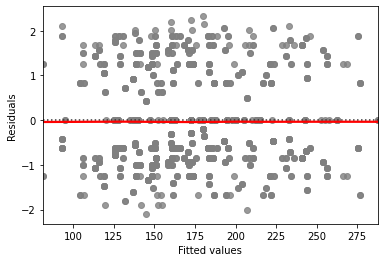

In [ ]:
# print("fittedvalues:\n", model.fittedvalues) #Preditctions on original dataset
# print("Residuals:\n", model.resid) #Actual response - predicted response

sns.residplot(
        x=model.fittedvalues,
        y=model.resid,
        data=df,
        lowess=True,
        scatter_kws={"color": "gray"}, 
        line_kws={"color": "red"}
    )
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Scale-location plot 
Square root of the standardized residuals versus the fitted values. 

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


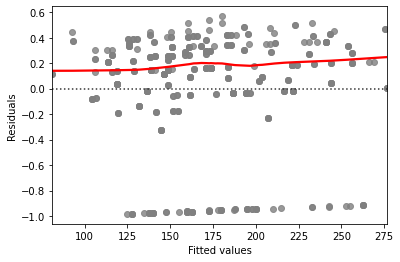

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(
        x=model.fittedvalues,
        y=np.sqrt(model.resid),
        data=df,
        lowess=True,
        scatter_kws={"color": "gray"}, 
        line_kws={"color": "red"}
    )
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
    sns.regplot(
        x=column_name1,
        y=column_name2,
        data=df,
        ci=None,
        scatter_kws={"color": "gray"}, 
        line_kws={"color": "red"}
    )
    plt.show()

NameError: ignored

# Q-Q plot
It shows whether or not the residuals follow a normal distribution


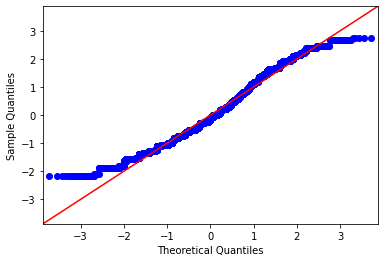

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
qqplot(df["MonthlyCharge"],norm,fit=True,line="45")
plt.show()

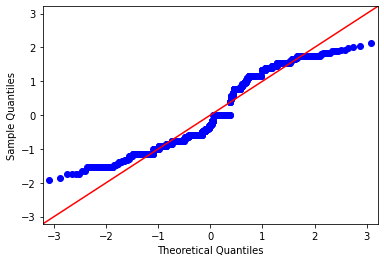

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
qqplot(model.resid,norm,fit=True,line="45")
plt.show()

#Making Predictions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

explanatory_data = df
predicted = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(
    MonthlyCharge_Predicted=predicted
)
print("Predicted Data:\n", prediction_data.head())





Predicted Data:
           Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ... 

RSE: The difference btween predicted data and observed data is typically 80147

#Visualizing a good fit